# Ice-cream Sales with Linear Regression 

 Hi! In this notebook, I'm implementing Linear Regression for the dataset of Ice-cream sales based on temperature  using **PyTorch**!

**1-** Importing necessary libraries:

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import pandas as pd
import mplcyberpunk                        # an optional library for modernizing matplotlib
                                           # install : pip install mplcyberpunk

**2-** Loading the dataset and and separating and visualizing it:

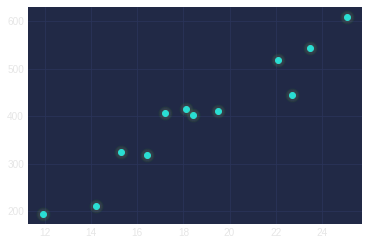

In [2]:
df = pd.read_csv('Ice-Cream-Sales-Temperature.csv')
x = df.Temperature.values
y = df.Sales.values
plt.style.use('cyberpunk')
plt.scatter(x,y)
mplcyberpunk.make_scatter_glow()
plt.show()

**3-** Creating a Linear Regression class using **PyTorch**:

In [3]:
# first we make a class for our model:
class LinearRegression(nn.Module):
    # All models must inherit from nn.Module => gives us necessary tools
    
    def __init__(self):
        super().__init__()  # calling the parent's constructor
        
        self.Weights = nn.Parameter(torch.randint(high=100,size=(1,1), # creating a random parameter for weight
                                   dtype=torch.float,
                                   requires_grad = True).squeeze()) # will require gradient because of GD
        # by default requires_grad is True for ((nn.Parameter))
        # nn.Parameter is also a tensor and is stored in Module.parameters
        # Parameters defined in here can also be layers of nueral network
        
        self.Bias = nn.Parameter(torch.randint(high=100,size=(1,1),
                                               dtype=torch.float,
                                               requires_grad = True).squeeze())
        
    # Since we inherited from nn.Module we must overwrite forward method:
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # takes torch.Tensor x as input and returns a torch.Tensor as prediction
        return self.Weights * x + self.Bias   # y = W.X + b

**4-** Instantiating and visualizing the **non-trained(raw)** model: 

Parameteres :

OrderedDict([('Weights', tensor(16.)), ('Bias', tensor(50.))])


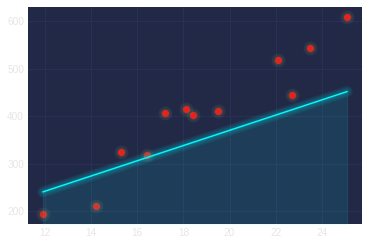

In [4]:
model = LinearRegression()
print('Parameteres :\n')
print(model.state_dict())

predicted_y = model(torch.from_numpy(x))
plt.scatter(x,y,color = 'r')
plt.plot(x,predicted_y.detach().numpy())
mplcyberpunk.make_lines_glow()
mplcyberpunk.make_scatter_glow()
mplcyberpunk.add_underglow()
plt.show()

**5-** Importing and instantiating a loss function and and optimizer:

In [5]:
from torch.nn import L1Loss     #importing Mean Squared Error as loss function
from torch.optim import Adam    #importing Adam as optimizer
criterion = L1Loss()
optimizer = Adam(params = model.parameters(),
                lr=1)  #learning rate

**6-** Building a training loop:

In [6]:
epochs = 1001
for epoch in range(epochs):
    y_pred = model(torch.from_numpy(x))
    loss = criterion(y_pred,torch.from_numpy(y))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch%100 == 0:
        print(f'epoch #{epoch} | loss: {loss}')

epoch #0 | loss: 69.56666666666666
epoch #100 | loss: 40.076531283060696
epoch #200 | loss: 33.74170417785643
epoch #300 | loss: 29.19267066319782
epoch #400 | loss: 27.37211481730142
epoch #500 | loss: 26.45335133870441
epoch #600 | loss: 25.717292785644517
epoch #700 | loss: 25.575337664286295
epoch #800 | loss: 25.654514312744112
epoch #900 | loss: 25.651437123616507
epoch #1000 | loss: 25.629969278971355


**7-** Visualizing the final trained model:

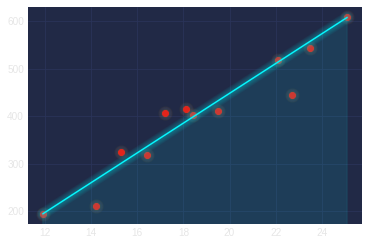

In [7]:
new_y = model(torch.from_numpy(x))
plt.scatter(x,y,color = 'r')
plt.plot(x,new_y.detach().numpy())
mplcyberpunk.make_lines_glow()
mplcyberpunk.make_scatter_glow()
mplcyberpunk.add_underglow()
plt.show()